In [9]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

df = pd.read_csv("/home/qyang/GLOm6a_three_groups_sites.csv", sep='\t', low_memory=False)

In [8]:
print(df.shape)

(130678, 12)


In [5]:
print(df.head())

  chrom  chromStart  chromEnd strand  GLORI_score  m6A_frequency  \
0     1      185037    185038      -         69.3          61.11   
1     1      185232    185233      -         34.4          12.09   
2     1      826938    826939      -         65.8          57.14   
3     1      841506    841507      +         73.7          92.31   
4     1      841558    841559      +         74.5          91.67   

   relative_difference group 5mer_context  difference  +_20%_difference  \
0                0.118  good        GGACT        8.19             0.118   
1                0.649   bad        GGACG       22.31             0.649   
2                0.132  good        TGACT        8.66             0.132   
3                0.202   bad        AGACT      -18.61            -0.202   
4                0.187  good        GAACT      -17.17            -0.187   

         threeg_groups  
0  diff between +/-20%  
1           diff > 20%  
2  diff between +/-20%  
3          diff < -20%  
4  diff between

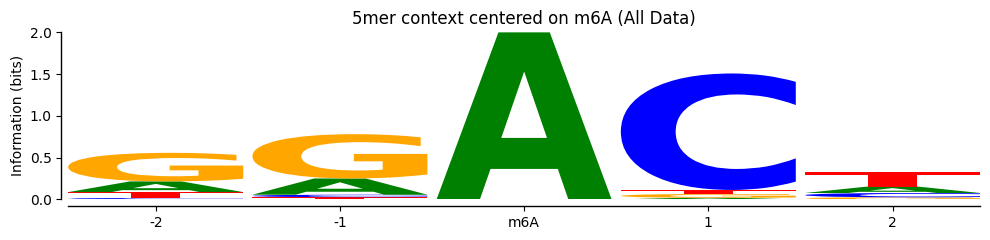

In [6]:
five_mers = df['5mer_context'].dropna().tolist()

info_matrix = logomaker.alignment_to_matrix(sequences=five_mers, to_type='information')

logo = logomaker.Logo(info_matrix, color_scheme="classic")

logo.ax.set_ylabel("Information (bits)")
logo.ax.set_ylim([0, 2]) 

logo.ax.set_xticks([0, 1, 2, 3, 4])
logo.ax.set_xticklabels(['-2', '-1', 'm6A', '1', '2'])

logo.style_spines(visible=False)
logo.style_spines(spines=["left", "bottom"], visible=True)
logo.ax.spines['left'].set_position(('outward', 5))
logo.ax.spines['bottom'].set_position(('outward', 5))

plt.title("5mer context centered on m6A (All Data)")

plt.tight_layout()
plt.show()